In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [18]:
# 1. Load and Preprocess the CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

 # Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

 # Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)
# Verify the shape of the data
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)
 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 164s 1us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [20]:
# 2. Define the CNN Model
model = models.Sequential()
# Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
# Convolutional Layer 2: 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())

# Max Pooling layer 1: Reduces spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))
 
# Convolutional Layer 3: 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Convolutional Layer 4: 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization()) 

 # Max Pooling layer 2: Reduces spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))
 
 # Convolutional Layer 5: 128 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())

 # Convolutional Layer 6: 128 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
 
 # Max Pooling layer 3: Reduces spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))
 
 # Flatten the output from the convolutional layers
model.add(layers.Flatten())
 
 # Fully connected layer 1: 128 units, ReLU activation
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) # Dropout for regularization
 
 # Fully connected layer 2: 10 units (one for each class), softmax activation
model.add(layers.Dense(10, activation='softmax'))
 

 # Print the model summary to see the architecture
model.summary()
 

C:\Users\elvir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [21]:
# 3. Compile the Model
  # Optimizer: Adam
 # Loss function: categorical crossentropy (suitable for multi-class classification)
 # Metrics: accuracy
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
 
 # 4. Train the model using the training data
 # Validation data is used to monitor performance on unseen data
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
validation_data=(test_images, test_labels))
 
 # 5. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
 


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 619ms/step - accuracy: 0.4107 - loss: 1.8195 - val_accuracy: 0.6622 - val_loss: 0.9585
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 671s 835ms/step - accuracy: 0.6833 - loss: 0.9070 - val_accuracy: 0.7071 - val_loss: 0.8467
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 527s 648ms/step - accuracy: 0.7611 - loss: 0.6892 - val_accuracy: 0.7223 - val_loss: 0.8152
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 484s 618ms/step - accuracy: 0.7988 - loss: 0.5848 - val_accuracy: 0.7684 - val_loss: 0.6871
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 487s 622ms/step - accuracy: 0.8374 - loss: 0.4727 - val_accuracy: 0.7599 - val_loss: 0.7061
313/313 - 23s - 72ms/step - accuracy: 0.7599 - loss: 0.7061

Test accuracy: 0.7598999738693237


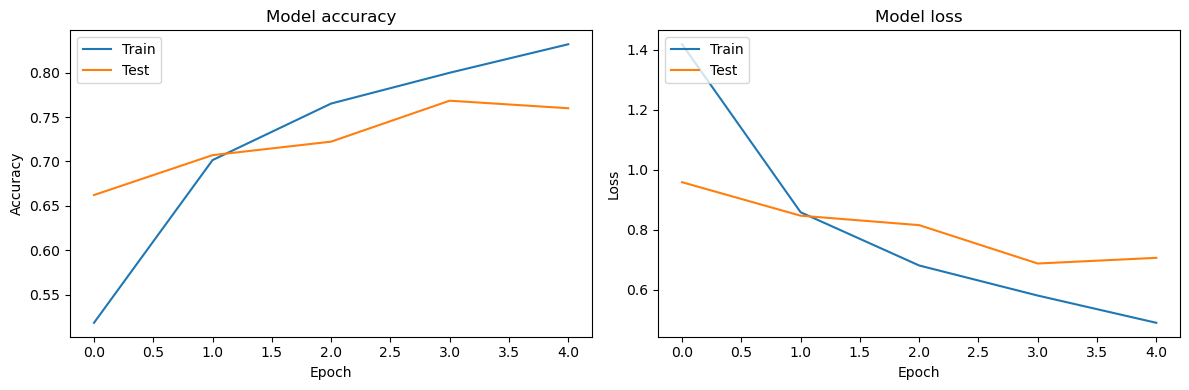

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step
[3 1 8 8 6 6 1 6 3 1]


In [24]:
 # our step six is plot Training History (Accuracy and Loss) Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
 

 # Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
 
plt.tight_layout()
plt.show()

 # 7 Make predictions on the test data
predictions = model.predict(test_images)
  # To get the predicted class for each image:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
 # Print some predictions
print(predicted_classes[:10]) # Show the first 10 predictions

In [25]:
# Print some predictions
print(predicted_classes[:50]) # Show the first 50 predictions

[3 1 8 8 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 9 5 0 9 6 6 4 2 5 9 8 4
 9 9 5 4 6 5 6 0 9 3 9 7 2]
